In [7]:
import os
from time import time

import matplotlib.pyplot as plt
import numpy as np

from spineq.data_fetcher import lad20nm_to_lad20cd
from spineq.optimise import calc_oa_weights, optimise
from spineq.plotting import plot_oa_weights, plot_optimisation_result

os.getcwd()
NB_DIR = "/Users/jroberts/GitHub/spatial-inequality/notebooks"
PLOT_DIR = NB_DIR + "/../data/img/pop_workplace_weight"
os.makedirs(PLOT_DIR, exist_ok=True)
%matplotlib inline

In [8]:
lad20nm = "Newcastle upon Tyne"
lad20cd = lad20nm_to_lad20cd(lad20nm)

n_sensors = 20
theta = 500

# colour scale range
vmin = 0
vmax = 0.01

# save (and overwrite) plots?
save = False

## Total Population Only

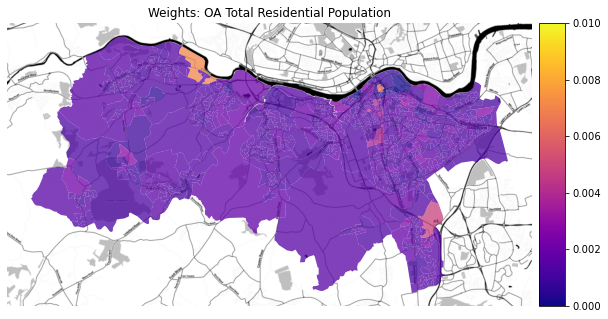

In [9]:
population_weight = 1
workplace_weight = 0
pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 1},
    "pop_children": {"min": 0, "max": 16, "weight": 0},
    "pop_elderly": {"min": 70, "max": 90, "weight": 0},
}

weights = calc_oa_weights(
    lad20cd=lad20cd,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    combine=True,
)

if save:
    save_path = NB_DIR + "/../data/img/totalpop_weights.png"
else:
    save_path = None

plot_oa_weights(
    lad20cd,
    weights,
    title="Weights: OA Total Residential Population",
    vmin=vmin,
    vmax=vmax,
    save_path=save_path,
)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.06
Placing sensor 2 out of 20 ... coverage = 0.08
Placing sensor 3 out of 20 ... coverage = 0.11
Placing sensor 4 out of 20 ... coverage = 0.13
Placing sensor 5 out of 20 ... coverage = 0.15
Placing sensor 6 out of 20 ... coverage = 0.17
Placing sensor 7 out of 20 ... coverage = 0.19
Placing sensor 8 out of 20 ... coverage = 0.21
Placing sensor 9 out of 20 ... coverage = 0.23
Placing sensor 10 out of 20 ... coverage = 0.24
Placing sensor 11 out of 20 ... coverage = 0.25
Placing sensor 12 out of 20 ... coverage = 0.27
Placing sensor 13 out of 20 ... coverage = 0.28
Placing sensor 14 out of 20 ... coverage = 0.29
Placing sensor 15 out of 20 ... coverage = 0.30
Placing sensor 16 out of 20 ... coverage = 0.31
Placing sensor 17 out of 20 ... coverage = 0.32
Placing sensor 18 out of 20 ... coverage = 0.33
Placing sensor 19 out of 20 ... coverage = 0.34
Placing sensor 20 out of 20 ... coverage = 0.35
Took 22.774152994155884 seconds


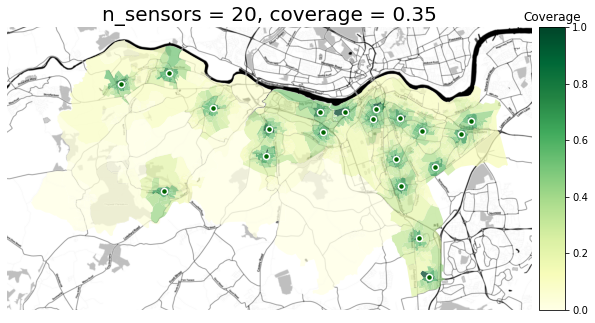

In [10]:
start_time = time()

result = optimise(
    lad20cd=lad20cd,
    n_sensors=n_sensors,
    theta=theta,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
)

print("Took", time() - start_time, "seconds")

if save:
    save_path = NB_DIR + "/../data/img/totalpop_opt.png"
else:
    save_path = None

plot_optimisation_result(result, save_path=save_path)

## Place of Work Only

NB: Does using population weighted centroid make sense for workplace? Only alternative is to use OA (non-weighted) centroid. More complex for optimisation to use different locations for each one.

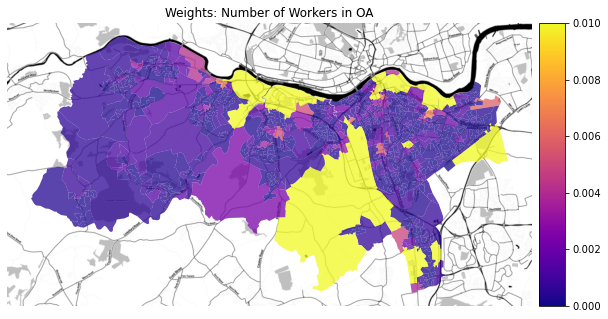

In [11]:
population_weight = 0
workplace_weight = 1
pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 1},
    "pop_children": {"min": 0, "max": 16, "weight": 0},
    "pop_elderly": {"min": 70, "max": 90, "weight": 0},
}

weights = calc_oa_weights(
    lad20cd=lad20cd,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    combine=True,
)

if save:
    save_path = NB_DIR + "/../data/img/workplace_weights.png"
else:
    save_path = None

plot_oa_weights(
    lad20cd,
    weights,
    title="Weights: Number of Workers in OA",
    vmin=vmin,
    vmax=vmax,
    save_path=save_path,
)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.17
Placing sensor 2 out of 20 ... coverage = 0.28
Placing sensor 3 out of 20 ... coverage = 0.34
Placing sensor 4 out of 20 ... coverage = 0.38
Placing sensor 5 out of 20 ... coverage = 0.42
Placing sensor 6 out of 20 ... coverage = 0.45
Placing sensor 7 out of 20 ... coverage = 0.48
Placing sensor 8 out of 20 ... coverage = 0.51
Placing sensor 9 out of 20 ... coverage = 0.54
Placing sensor 10 out of 20 ... coverage = 0.56
Placing sensor 11 out of 20 ... coverage = 0.58
Placing sensor 12 out of 20 ... coverage = 0.60
Placing sensor 13 out of 20 ... coverage = 0.61
Placing sensor 14 out of 20 ... coverage = 0.62
Placing sensor 15 out of 20 ... coverage = 0.63
Placing sensor 16 out of 20 ... coverage = 0.64
Placing sensor 17 out of 20 ... coverage = 0.65
Placing sensor 18 out of 20 ... coverage = 0.66
Placing sensor 19 out of 20 ... coverage = 0.67
Placing sensor 20 out of 20 ... coverage = 0.68


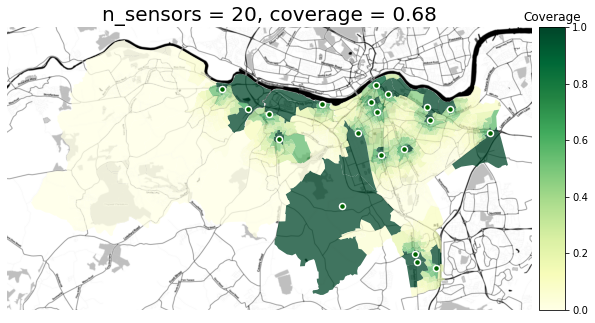

In [12]:
result = optimise(
    lad20cd=lad20cd,
    n_sensors=n_sensors,
    theta=theta,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
)

if save:
    save_path = NB_DIR + "/../data/img/workplace_opt.png"
else:
    save_path = None

plot_optimisation_result(result, save_path=save_path)

## Children <16 Years Old Only

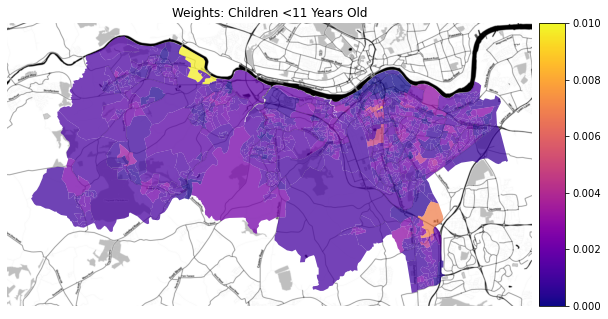

In [13]:
population_weight = 1
workplace_weight = 0
pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 0},
    "pop_children": {"min": 0, "max": 16, "weight": 1},
    "pop_elderly": {"min": 70, "max": 90, "weight": 0},
}

weights = calc_oa_weights(
    lad20cd=lad20cd,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    combine=True,
)

if save:
    save_path = NB_DIR + "/../data/img/children_weights.png"
else:
    save_path = None

plot_oa_weights(
    lad20cd,
    weights,
    title="Weights: Children <11 Years Old",
    vmin=vmin,
    vmax=vmax,
    save_path=save_path,
)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.06
Placing sensor 2 out of 20 ... coverage = 0.09
Placing sensor 3 out of 20 ... coverage = 0.12
Placing sensor 4 out of 20 ... coverage = 0.15
Placing sensor 5 out of 20 ... coverage = 0.17
Placing sensor 6 out of 20 ... coverage = 0.19
Placing sensor 7 out of 20 ... coverage = 0.21
Placing sensor 8 out of 20 ... coverage = 0.22
Placing sensor 9 out of 20 ... coverage = 0.24
Placing sensor 10 out of 20 ... coverage = 0.26
Placing sensor 11 out of 20 ... coverage = 0.27
Placing sensor 12 out of 20 ... coverage = 0.29
Placing sensor 13 out of 20 ... coverage = 0.30
Placing sensor 14 out of 20 ... coverage = 0.31
Placing sensor 15 out of 20 ... coverage = 0.32
Placing sensor 16 out of 20 ... coverage = 0.33
Placing sensor 17 out of 20 ... coverage = 0.34
Placing sensor 18 out of 20 ... coverage = 0.35
Placing sensor 19 out of 20 ... coverage = 0.36
Placing sensor 20 out of 20 ... coverage = 0.37


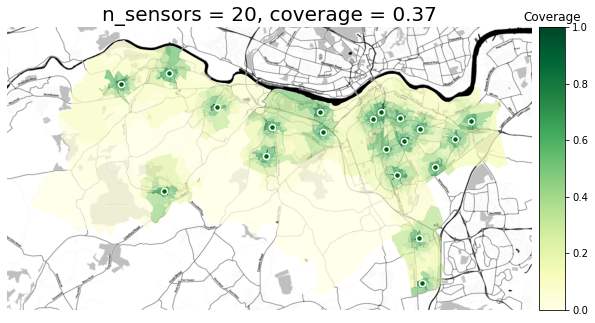

In [14]:
result = optimise(
    lad20cd=lad20cd,
    n_sensors=n_sensors,
    theta=theta,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
)

if save:
    save_path = NB_DIR + "/../data/img/children_opt.png"
else:
    save_path = None

plot_optimisation_result(result, save_path=save_path)

## Adults >=70 Only

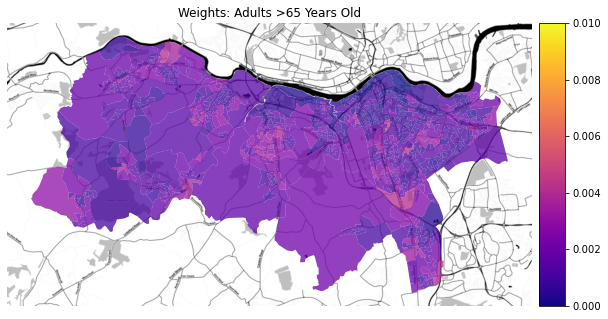

In [15]:
population_weight = 1
workplace_weight = 0
pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 0},
    "pop_children": {"min": 0, "max": 16, "weight": 0},
    "pop_elderly": {"min": 70, "max": 90, "weight": 1},
}

weights = calc_oa_weights(
    lad20cd=lad20cd,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    combine=True,
)
if save:
    save_path = NB_DIR + "/../data/img/elderly_weights.png"
else:
    save_path = None

plot_oa_weights(
    lad20cd,
    weights,
    title="Weights: Adults >65 Years Old",
    vmin=vmin,
    vmax=vmax,
    save_path=save_path,
)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.04
Placing sensor 2 out of 20 ... coverage = 0.07
Placing sensor 3 out of 20 ... coverage = 0.09
Placing sensor 4 out of 20 ... coverage = 0.12
Placing sensor 5 out of 20 ... coverage = 0.14
Placing sensor 6 out of 20 ... coverage = 0.17
Placing sensor 7 out of 20 ... coverage = 0.19
Placing sensor 8 out of 20 ... coverage = 0.21
Placing sensor 9 out of 20 ... coverage = 0.22
Placing sensor 10 out of 20 ... coverage = 0.24
Placing sensor 11 out of 20 ... coverage = 0.26
Placing sensor 12 out of 20 ... coverage = 0.27
Placing sensor 13 out of 20 ... coverage = 0.29
Placing sensor 14 out of 20 ... coverage = 0.30
Placing sensor 15 out of 20 ... coverage = 0.31
Placing sensor 16 out of 20 ... coverage = 0.32
Placing sensor 17 out of 20 ... coverage = 0.33
Placing sensor 18 out of 20 ... coverage = 0.34
Placing sensor 19 out of 20 ... coverage = 0.35
Placing sensor 20 out of 20 ... coverage = 0.36


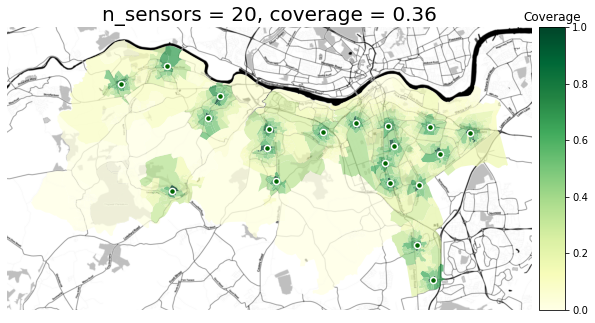

In [16]:
result = optimise(
    lad20cd=lad20cd,
    n_sensors=n_sensors,
    theta=theta,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
)

if save:
    save_path = NB_DIR + "/../data/img/elderly_opt.png"
else:
    save_path = None

plot_optimisation_result(result, save_path=save_path)

## Combined Weights, Varied by Age

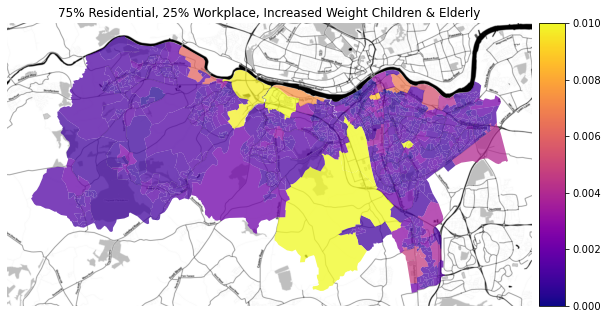

In [17]:
population_weight = 0.75
workplace_weight = 0.25
pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 1},
    "pop_children": {"min": 0, "max": 16, "weight": 3},
    "pop_elderly": {"min": 70, "max": 90, "weight": 2},
}

weights = calc_oa_weights(
    lad20cd=lad20cd,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    combine=True,
)

if save:
    save_path = NB_DIR + "/../data/img/mixed_weights.png"
else:
    save_path = None


plot_oa_weights(
    lad20cd,
    weights,
    title="75% Residential, 25% Workplace, Increased Weight Children & Elderly",
    vmin=vmin,
    vmax=vmax,
    save_path=save_path,
)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.07
Placing sensor 2 out of 20 ... coverage = 0.10
Placing sensor 3 out of 20 ... coverage = 0.14
Placing sensor 4 out of 20 ... coverage = 0.17
Placing sensor 5 out of 20 ... coverage = 0.19
Placing sensor 6 out of 20 ... coverage = 0.21
Placing sensor 7 out of 20 ... coverage = 0.23
Placing sensor 8 out of 20 ... coverage = 0.24
Placing sensor 9 out of 20 ... coverage = 0.26
Placing sensor 10 out of 20 ... coverage = 0.27
Placing sensor 11 out of 20 ... coverage = 0.29
Placing sensor 12 out of 20 ... coverage = 0.30
Placing sensor 13 out of 20 ... coverage = 0.31
Placing sensor 14 out of 20 ... coverage = 0.33
Placing sensor 15 out of 20 ... coverage = 0.34
Placing sensor 16 out of 20 ... coverage = 0.35
Placing sensor 17 out of 20 ... coverage = 0.36
Placing sensor 18 out of 20 ... coverage = 0.37
Placing sensor 19 out of 20 ... coverage = 0.38
Placing sensor 20 out of 20 ... coverage = 0.39


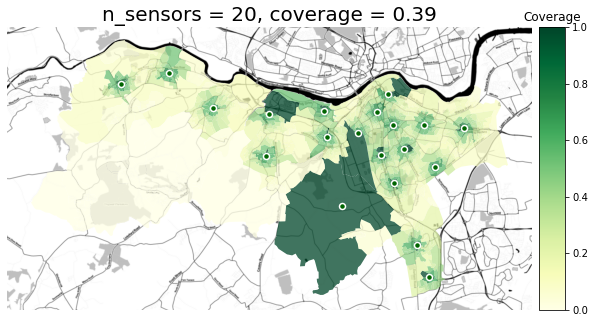

In [18]:
result = optimise(
    lad20cd=lad20cd,
    n_sensors=n_sensors,
    theta=theta,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
)

if save:
    save_path = NB_DIR + "/../data/img/mixed_opt.png"
else:
    save_path = None

plot_optimisation_result(result, save_path=save_path)

## Loop: Const Age Weighting, Vary Workplace vs Residential

In [21]:
if save:
    for w in np.linspace(0, 1, 11):
        print("=" * 50)
        print("POP WEIGHT: ", w)
        print("=" * 50)

        population_weight = w
        workplace_weight = 1 - w

        pop_age_groups = {
            "pop_total": {"min": 0, "max": 90, "weight": 1},
            "pop_children": {"min": 0, "max": 16, "weight": 0},
            "pop_elderly": {"min": 70, "max": 90, "weight": 0},
        }

        title = "Weights: population={:.2f}, workplace={:.2f}".format(
            population_weight, workplace_weight
        )
        save_path = PLOT_DIR + "/pop_{:04d}_wplace_{:04d}".format(
            int(1000 * population_weight), int(1000 * workplace_weight)
        )

        weights = calc_oa_weights(
            lad20cd=lad20cd,
            population_weight=population_weight,
            workplace_weight=workplace_weight,
            pop_age_groups=pop_age_groups,
            combine=True,
        )

        plot_oa_weights(
            lad20cd,
            weights,
            title=title,
            vmin=vmin,
            vmax=vmax,
            save_path=save_path + "_WEIGHTS.png",
        )

        result = optimise(
            lad20cd=lad20cd,
            n_sensors=n_sensors,
            theta=theta,
            population_weight=population_weight,
            workplace_weight=workplace_weight,
            pop_age_groups=pop_age_groups,
        )

        plot_optimisation_result(
            result,
            title=title + ", coverage={:.2f}".format(result["total_coverage"]),
            save_path=save_path + "_SENSORS.png",
        )

        plt.close("all")

In [22]:
n_sensors = 10
theta = 100
population_weight = 0.5
workplace_weight = 0.5

pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 1},
    "pop_children": {"min": 0, "max": 16, "weight": 0},
    "pop_elderly": {"min": 70, "max": 90, "weight": 0},
}

title = "Weights: population={:.2f}, workplace={:.2f}".format(
    population_weight, workplace_weight
)

run_name = "pop_{:04d}_wplace_{:04d}".format(
    int(1000 * population_weight), int(1000 * workplace_weight)
)
save_path = PLOT_DIR + "/" + run_name

weights = calc_oa_weights(
    lad20cd=lad20cd,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    combine=True,
)

plot_oa_weights(
    lad20cd,
    weights,
    title=title,
    vmin=vmin,
    vmax=vmax,
    save_path=save_path + "_WEIGHTS.png",
)

result = optimise(
    lad20cd=lad20cd,
    n_sensors=n_sensors,
    theta=theta,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    save_result=True,
    save_dir=PLOT_DIR,
    run_name=run_name,
)

plot_optimisation_result(
    result,
    title=title + ", coverage={:.2f}".format(result["total_coverage"]),
    save_path=save_path + "_SENSORS.png",
)

plt.close("all")

Fetching data...
Placing sensor 1 out of 10 ... coverage = 0.08
Placing sensor 2 out of 10 ... coverage = 0.13
Placing sensor 3 out of 10 ... coverage = 0.15
Placing sensor 4 out of 10 ... coverage = 0.17
Placing sensor 5 out of 10 ... coverage = 0.18
Placing sensor 6 out of 10 ... coverage = 0.20
Placing sensor 7 out of 10 ... coverage = 0.22
Placing sensor 8 out of 10 ... coverage = 0.23
Placing sensor 9 out of 10 ... coverage = 0.24
Placing sensor 10 out of 10 ... coverage = 0.25
